#### Model Training

##### 1.1 Import Data and Required Packages

Importing Libraries.

In [61]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling evaluation
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score


Import the CSV Data as Pandas DataFrame


In [62]:
df = pd.read_csv('diabetes-2-1.csv')

Show Top 5 Records

In [63]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Replace the Zeros Values

In [64]:
# Create an instance of SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Define the columns you want to impute
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zero values with NaN
df.loc[:, columns_to_impute] = df[columns_to_impute].replace(0, np.nan)


# Fit the imputer on the columns with missing values
imputer.fit(df[columns_to_impute])

# Transform the DataFrame by imputing missing values
df[columns_to_impute] = imputer.transform(df[columns_to_impute])

In [65]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Preparing X and Y variables

In [66]:
# independent and dependent features
X = df.drop('Outcome',axis=1) #df.iloc[:,:-1]
y = df['Outcome'] # df.iloc[:,-1]

Train Test split

In [67]:
# Importing the train_test_split function from sklearn.model_selection module
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
# X: Features, y: Target variable
# test_size=0.2 indicates that 20% of the data will be used for testing, while 80% will be used for training
# random_state=0 sets a random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Printing the shapes of the original features, and the training and testing sets
print(X.shape, X_test.shape, X_train.shape)

(768, 8) (154, 8) (614, 8)


Data Standarization

In [68]:
# Importing the StandardScaler class from the sklearn.preprocessing module
from sklearn.preprocessing import StandardScaler

# Creating a StandardScaler object
scaler = StandardScaler()

# Standardizing the features in the training set (X_train)
# fit_transform() method calculates the mean and standard deviation of each feature in X_train
# and then standardizes the features by subtracting the mean and dividing by the standard deviation
X_train = scaler.fit_transform(X_train)

# Standardizing the features in the testing set (X_test)
# transform() method uses the mean and standard deviation calculated from X_train to standardize X_test
# This ensures that both training and testing sets are standardized using the same scaling parameters
X_test = scaler.transform(X_test)

#### Training the Model

1. Logistic Regression

In [69]:
# Importing the LogisticRegression class from the sklearn.linear_model module
from sklearn.linear_model import LogisticRegression

# Creating a LogisticRegression object
lr = LogisticRegression()
# Train the model on the training data
lr.fit(X_train,y_train)

LogisticRegression()

2. Support Vector Machine SVM

In [70]:
# Importing the SVC (Support Vector Classifier) class from the sklearn.svm module
from sklearn.svm import SVC

# Creating an SVC object
svm = SVC()
# Train the model on the training data
svm.fit(X_train,y_train)

SVC()

3. K Nearest Neighbors


In [71]:
# Importing the KNeighborsClassifier class from the sklearn.neighbors module
from sklearn.neighbors import KNeighborsClassifier

# Creating a KNeighborsClassifier object
knn = KNeighborsClassifier()
# Train the model on the training data
knn.fit(X_train,y_train)

KNeighborsClassifier()

4. Gradient Boosting 

In [72]:
# Importing the GradientBoostingClassifier class from the sklearn.ensemble
from sklearn.ensemble import GradientBoostingClassifier

# Initialize a Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the training data
gb.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

5. Decision Tree

In [73]:
# Importing the DecisionTreeClassifier class from the sklearn.tree module
from sklearn.tree import DecisionTreeClassifier

# Creating a DecisionTreeClassifier object
dt = DecisionTreeClassifier()
#Fit The model
dt.fit(X_train,y_train)

DecisionTreeClassifier()

6. Random Forest

In [74]:
# Importing the RandomForestClassifier class from the sklearn.ensemble module
from sklearn.ensemble import RandomForestClassifier

# Creating a RandomForestClassifier object
rf = RandomForestClassifier()
#Fit The model
rf.fit(X_train,y_train)

RandomForestClassifier()

### Assess the complexity of each model

In [75]:
def assess_model_complexity(model):
    num_parameters = model._get_param_names()  # Get the names of the parameters
    computational_complexity = "High" if hasattr(model, "decision_function") else "Low"  # Check if the model has a decision function
    interpretability = "High" if hasattr(model, "feature_importances_") else "Low"  # Check if the model has feature importances
    return num_parameters, computational_complexity, interpretability

In [76]:
# Define models list
models = [lr, knn, gb, svm, dt, rf]
# Initialize an empty list to store the rows of the table
table_data = []

# Populate the table data with the complexity assessment for each model
for model, model_name in zip(models, ["Logistic Regression", "K-Nearest Neighbors", "Gradient Boosting", "Support Vector Machine", "Decision Tree", "Random Forest"]):
    num_parameters, computational_complexity, interpretability = assess_model_complexity(model)
    table_data.append([model_name, len(num_parameters), computational_complexity, interpretability])

# Define the headers for the table
headers = ["Model", "Num Parameters", "Computational Complexity", "Interpretability"]

# Convert the table data to a DataFrame
df = pd.DataFrame(table_data, columns=headers)

# Print the DataFrame
display(df)


,Model,Num Parameters,Computational Complexity,Interpretability
0,Logistic Regression,15,High,Low
1,K-Nearest Neighbors,8,Low,Low
2,Gradient Boosting,20,High,High
3,Support Vector Machine,15,High,Low
4,Decision Tree,12,Low,High
5,Random Forest,18,Low,High


Evalute thr models before parameters tuning

Confusion Metrix

In [77]:
from sklearn.metrics import confusion_matrix

# Define a function to plot confusion matrix and return TP, FP, TN, FN
def plot_confusion_matrix(ax, model, X_test, y_test, title):
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False, ax=ax)  # Plot heatmap with annotations
    ax.set_xlabel('Predicted labels')  # Set x-axis label
    ax.set_ylabel('True labels')  # Set y-axis label
    ax.set_title(title)  # Set title
    
    # Extract TP, FP, TN, FN from confusion matrix
    tn, fp, fn, tp = cm.ravel()  # Extract values from confusion matrix
    
    return tp, fp, tn, fn  # Return TP, FP, TN, FN

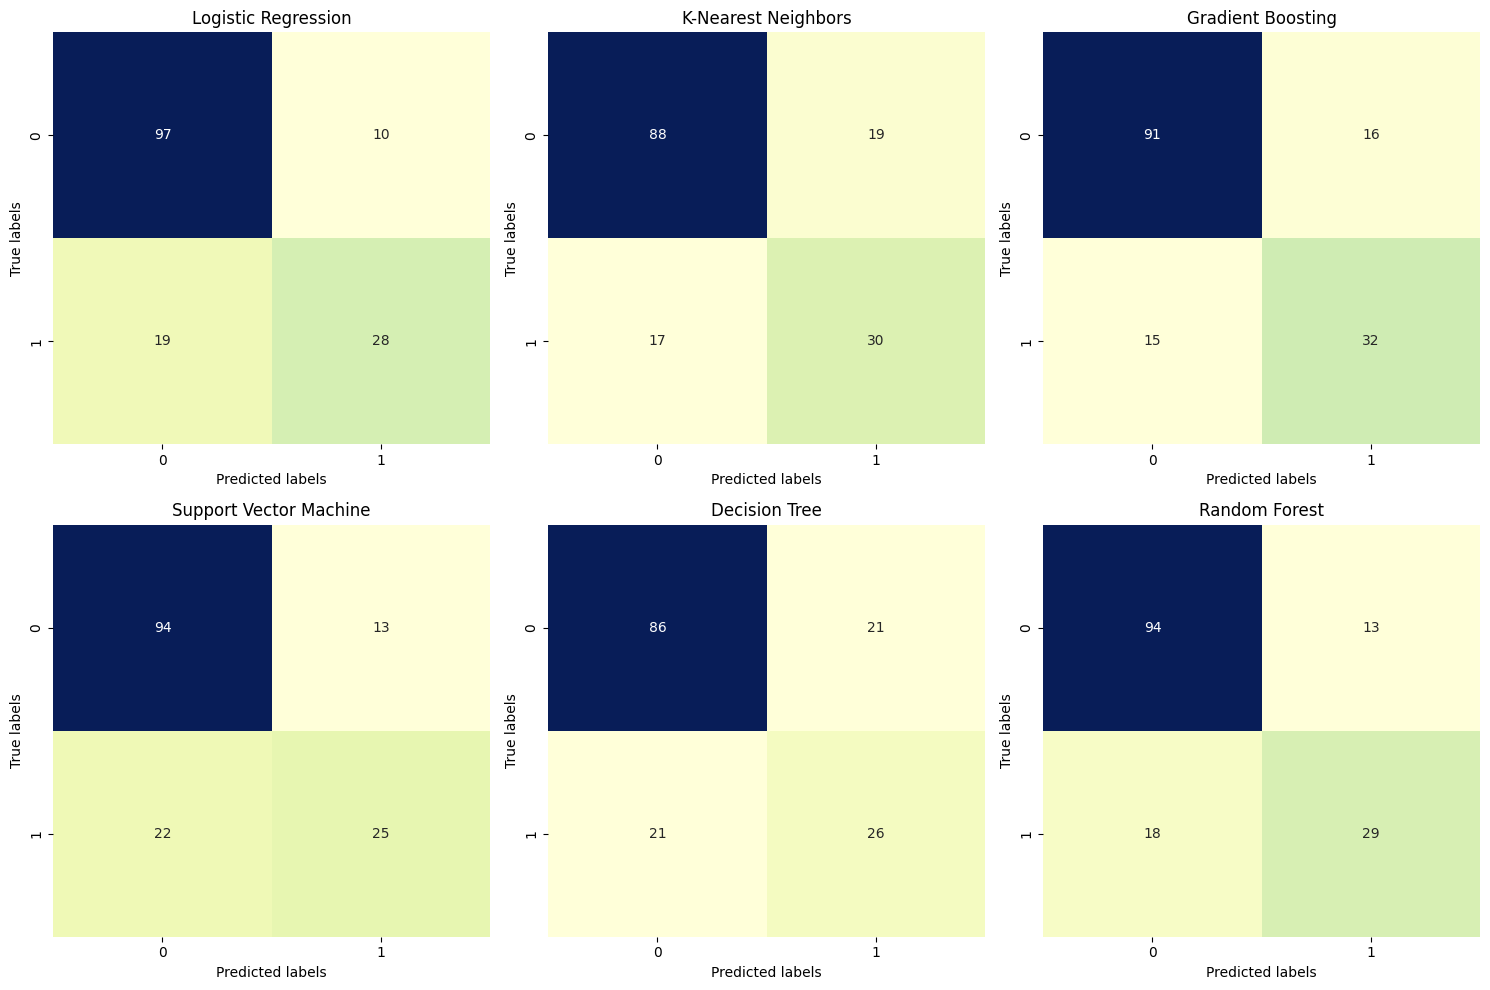

In [78]:
# Plot confusion matrices for each model in a grid
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Create a 2x3 grid of subplots
models_names = ["Logistic Regression", "K-Nearest Neighbors", "Gradient Boosting", "Support Vector Machine", "Decision Tree", "Random Forest"]  # List of model names
results = []  # List to store results
for i, model in enumerate(models):  # Iterate over models
    row = i // 3  # Calculate row index
    col = i % 3  # Calculate column index
    tp, fp, tn, fn = plot_confusion_matrix(axes[row, col], model, X_test, y_test, models_names[i])  # Plot confusion matrix for current model
    results.append({"Model": models_names[i], "TP": tp, "FP": fp, "TN": tn, "FN": fn})  # Store results in a dictionary

plt.tight_layout()  # Adjust subplot layout to make plots fit into the figure area
plt.show()  # Show the plots

In [79]:
# Create DataFrame from results
results_df = pd.DataFrame(results)

# Reorder columns if needed
results_df = results_df[["Model", "TP", "FP", "TN", "FN"]]

# display DataFrame
display(results_df)

,Model,TP,FP,TN,FN
0,Logistic Regression,28,10,97,19
1,K-Nearest Neighbors,30,19,88,17
2,Gradient Boosting,32,16,91,15
3,Support Vector Machine,25,13,94,22
4,Decision Tree,26,21,86,21
5,Random Forest,29,13,94,18


#### accuracy score, precision score, recall score, f1 score, roc_auc_score and Cross-Validation Accuracy

In [80]:
# Define a function to compute specificity
def specificity_score(y_true, y_pred):
    # Compute confusion matrix and unpack values
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    # Compute specificity
    specificity = tn / (tn + fp)
    return specificity

# Define lists to store evaluation metrics for test sets
evaluation_metrics_test = []

# Define a function to compute evaluation metrics for a single model
def compute_evaluation_metrics(model, X_test, y_test):
    # Predict on test set
    y_test_pred = model.predict(X_test)
    
    # Compute evaluation metrics for test set
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    specificity_test = specificity_score(y_test, y_test_pred)  # Calculate specificity
    f1_test = f1_score(y_test, y_test_pred)
    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    
    # Compute cross-validation accuracy for test set
    cv_accuracy_test = cross_val_score(model, X_test, y_test, cv=3, scoring='accuracy').mean()
    
    # Store insights in a dictionary
    insights_test = {
        "model_name": model.__class__.__name__,
        "accuracy": accuracy_test,
        "precision": precision_test,
        "recall": recall_test,
        "specificity": specificity_test,
        "f1": f1_test,
        "roc_auc": roc_auc_test,
        "cv_accuracy": cv_accuracy_test
    }
    
    return insights_test



In [81]:
# Define lists to store insights for test sets
insights_test = []

# Define models list
models = [lr, knn, gb, svm, dt, rf]

# Loop through each model
for model in models:
    # Compute evaluation metrics for the model
    insights_test_model = compute_evaluation_metrics(model, X_test, y_test)
    
    # Append insights to the respective lists
    insights_test.append(insights_test_model)

# Create DataFrame for test sets
df_test = pd.DataFrame(insights_test)

# Select columns for the DataFrame
columns_to_select = ["Model",  "Accuracy", "Precision", "Recall/sensitivity", "Specificity", "F1-score", "ROC AUC", "Cross-Validation Accuracy"]

# Rename columns
df_test.columns = columns_to_select

# Display the DataFrame
print("\nTest Set Evaluation Metrics:")
display(df_test)


Test Set Evaluation Metrics:


,Model,Accuracy,Precision,Recall/sensitivity,Specificity,F1-score,ROC AUC,Cross-Validation Accuracy
0,LogisticRegression,0.811688,0.736842,0.595745,0.906542,0.658824,0.751143,0.791855
1,KNeighborsClassifier,0.766234,0.612245,0.638298,0.822430,0.625000,0.730364,0.746983
2,GradientBoostingClassifier,0.798701,0.666667,0.680851,0.850467,0.673684,0.765659,0.791352
3,SVC,0.772727,0.657895,0.531915,0.878505,0.588235,0.705210,0.805053
4,DecisionTreeClassifier,0.727273,0.553191,0.553191,0.803738,0.553191,0.678465,0.681373
5,RandomForestClassifier,0.798701,0.690476,0.617021,0.878505,0.651685,0.747763,0.791730


#### Best Parmeters for Models

In [82]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

# Define Models
models = [lr, knn, gb, svm, dt, rf]

# Define hyperparameter grid for Logistic Regression model
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter values to test
    'penalty': ['l2']  # Penalty term for regularization ('l2' for ridge regularization)
}

# Define hyperparameter grid for K-Nearest Neighbors (KNN) model
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance']  # Weight function used in prediction
}

# Define the hyperparameter grid for Gradient Boosting model
param_grid_gb = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages to be run
    'max_depth': [3, 5, 7],  # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']  # Maximum number of features to consider when splitting a node
}

# Define hyperparameter grid for Support Vector Machine (SVM) model
param_grid_svm = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel function used for the decision function
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf' and 'poly' kernels
}


# Define hyperparameter grid for Decision Tree model
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40],  # Maximum depth of the tree (None means unlimited)
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None]  # Maximum number of features to consider when splitting a node
}


# Define hyperparameter grid for Random Forest model
param_grid_rf = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [None, 10],  # Maximum depth of the trees in the forest
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']  # Maximum number of features to consider when splitting a node
}
# Define a list of param_grids corresponding to each model
param_grids = [param_grid_lr, param_grid_knn, param_grid_gb, param_grid_svm, param_grid_dt, param_grid_rf]
# Define scoring functions
scorers = {
    'accuracy_score': make_scorer(accuracy_score),
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score)
}

# Iterate over each model and its corresponding param_grid
for i in range(len(models)):
    model = models[i]  # Get the current model
    param_grid = param_grids[i]  # Get the corresponding hyperparameter grid
    
    
  # Perform GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring=scorers, refit='accuracy_score')
    grid_search.fit(X_train, y_train)
    
     # Retrieve best parameters and best scores
    best_params = grid_search.best_params_
    best_scores = grid_search.cv_results_

    # Update model with best parameters and fit the model
    model.set_params(**grid_search.best_params_)
    model.fit(X_train, y_train)
    
# Print best parameters and best scores
    print(f"Best Parameters for {model.__class__.__name__}: {best_params}")
    print(f"Best Scores for {model.__class__.__name__}:")
    for scorer in scorers:
        print(f"{scorer}: {best_scores['mean_test_' + scorer][grid_search.best_index_]}")
    print()

d:\MLproject\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\MLproject\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\MLproject\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best Parameters for LogisticRegression: {'C': 0.1, 'penalty': 'l2'}
Best Scores for LogisticRegression:
accuracy_score: 0.7622284419565506
precision_score: 0.7177227801689782
recall_score: 0.5573737373737374

Best Parameters for KNeighborsClassifier: {'n_neighbors': 9, 'weights': 'distance'}
Best Scores for KNeighborsClassifier:
accuracy_score: 0.7573770491803279
precision_score: 0.6825200534759358
recall_score: 0.6250505050505051

Best Parameters for GradientBoostingClassifier: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Scores for GradientBoostingClassifier:
accuracy_score: 0.7655071304811408
precision_score: 0.6910834892631204
recall_score: 0.6343434343434343



d:\MLproject\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\MLproject\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\MLproject\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\MLproject\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set

Best Parameters for SVC: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Scores for SVC:
accuracy_score: 0.7589764094362256
precision_score: 0.706975933377202
recall_score: 0.5573737373737374

Best Parameters for DecisionTreeClassifier: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Scores for DecisionTreeClassifier:
accuracy_score: 0.7312674930027988
precision_score: 0.6439576954211101
recall_score: 0.5841414141414142

Best Parameters for RandomForestClassifier: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Scores for RandomForestClassifier:
accuracy_score: 0.7638544582167134
precision_score: 0.6891821862348179
recall_score: 0.620909090909091



####  Evaluate The models after Parameters tuning

confusion Metrix

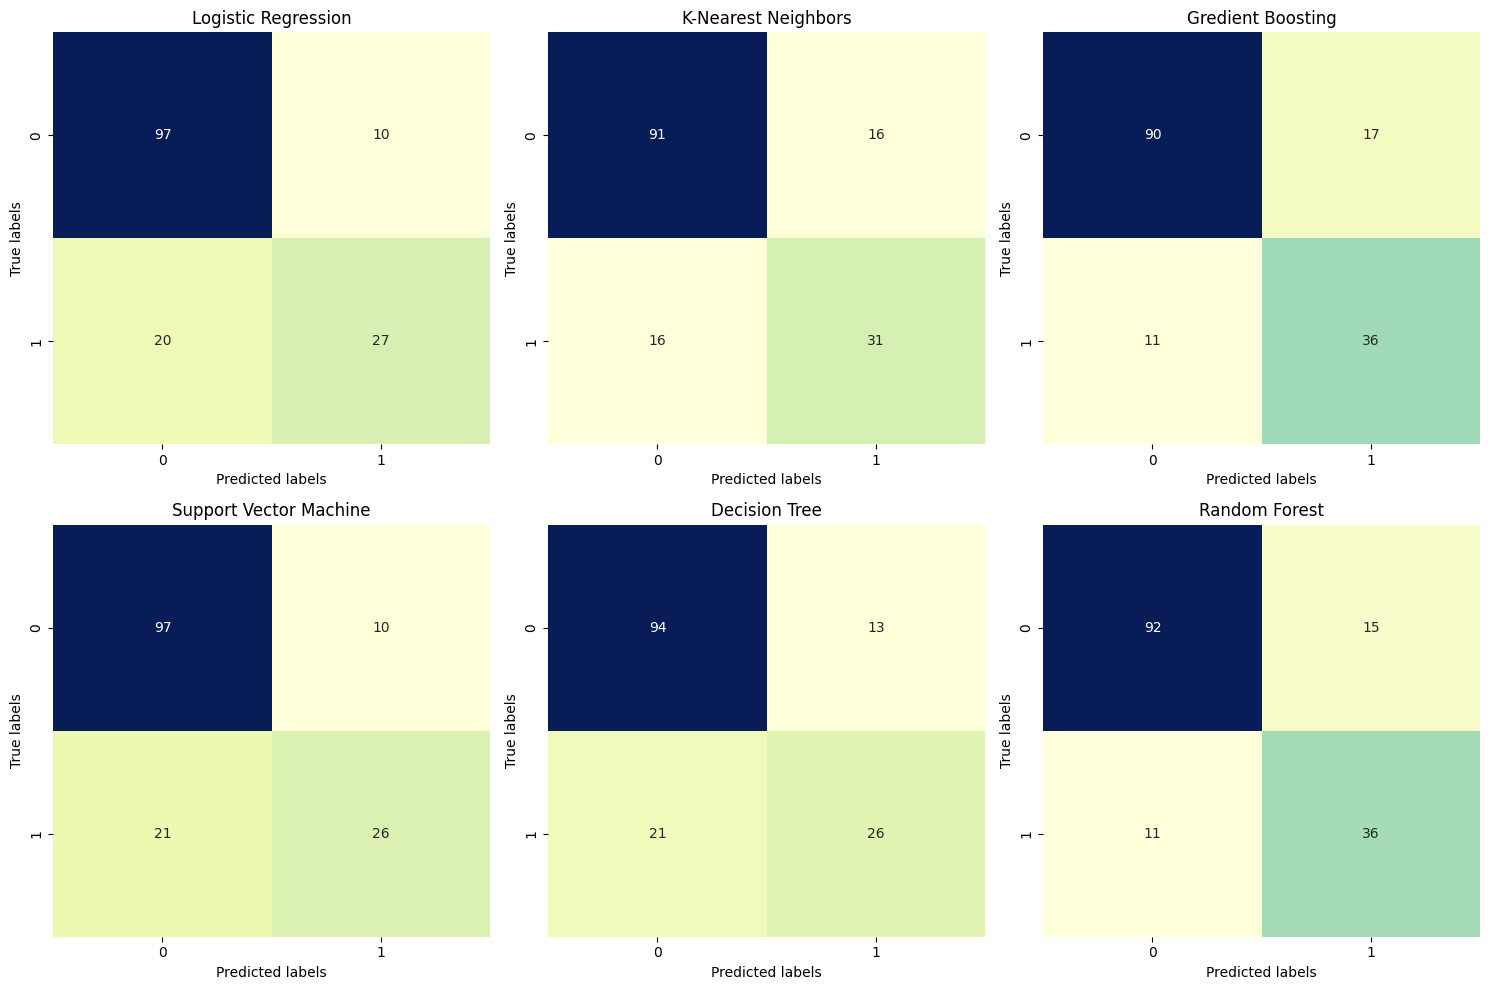

In [83]:
# Plot confusion matrices for each model in a grid
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Create a 2x3 grid of subplots
models_names = ["Logistic Regression", "K-Nearest Neighbors", "Gredient Boosting", "Support Vector Machine", "Decision Tree", "Random Forest"]  # List of model names
results = []  # List to store results
for i, model in enumerate(models):  # Iterate over models
    row = i // 3  # Calculate row index
    col = i % 3  # Calculate column index
    tp, fp, tn, fn = plot_confusion_matrix(axes[row, col], model, X_test, y_test, models_names[i])  # Plot confusion matrix for current model
    results.append({"Model": models_names[i], "TP": tp, "FP": fp, "TN": tn, "FN": fn})  # Store results in a dictionary

plt.tight_layout()  # Adjust subplot layout to make plots fit into the figure area
plt.show()  # Show the plots

In [84]:
# Create DataFrame from results
results_df = pd.DataFrame(results)

# Reorder columns if needed
results_df = results_df[["Model", "TP", "FP", "TN", "FN"]]

# display DataFrame
display(results_df)

,Model,TP,FP,TN,FN
0,Logistic Regression,27,10,97,20
1,K-Nearest Neighbors,31,16,91,16
2,Gredient Boosting,36,17,90,11
3,Support Vector Machine,26,10,97,21
4,Decision Tree,26,13,94,21
5,Random Forest,36,15,92,11


In each cell, "TP" represents True Positives, "FP" represents False Positives, and "FN" represents False Negatives. "TN" represents True Negatives. These values are filled in for both the diabetic and non-diabetic classes for each model.

#### accuracy score, precision score, recall score, f1 score, roc_auc_score and Cross-Validation Accuracy

In [85]:
# Define lists to store insights for test sets
insights_test = []

# Define models list
models = [lr, knn, gb, svm, dt, rf]

# Loop through each model
for model in models:
    # Compute evaluation metrics for the model
    insights_test_model = compute_evaluation_metrics(model, X_test, y_test)
    
    # Append insights to the respective lists
    insights_test.append(insights_test_model)

# Create DataFrame for test sets
df_test = pd.DataFrame(insights_test)

# Select columns for the DataFrame
columns_to_select = ["Model",  "Accuracy", "Precision", "Recall/sensitivity", "Specificity", "F1-score", "ROC AUC", "Cross-Validation Accuracy"]

# Rename columns
df_test.columns = columns_to_select

# Display the DataFrame
print("\nTest Set Evaluation Metrics:")
display(df_test)


Test Set Evaluation Metrics:


,Model,Accuracy,Precision,Recall/sensitivity,Specificity,F1-score,ROC AUC,Cross-Validation Accuracy
0,LogisticRegression,0.805195,0.729730,0.574468,0.906542,0.642857,0.740505,0.791981
1,KNeighborsClassifier,0.792208,0.659574,0.659574,0.850467,0.659574,0.755021,0.792232
2,GradientBoostingClassifier,0.818182,0.679245,0.765957,0.841121,0.720000,0.803539,0.772373
3,SVC,0.798701,0.722222,0.553191,0.906542,0.626506,0.729867,0.791981
4,DecisionTreeClassifier,0.779221,0.666667,0.553191,0.878505,0.604651,0.715848,0.707893
5,RandomForestClassifier,0.831169,0.705882,0.765957,0.859813,0.734694,0.812885,0.798391


### Model Visulazation

In [86]:
!pip3 iinstall math

ERROR: unknown command "iinstall" - maybe you meant "install"



precision_recall_curve

In [87]:
from sklearn.metrics import precision_recall_curve
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds, model_name, ax):
    """
    Plot precision and recall scores as a function of the decision threshold.
    
    Parameters:
        precisions (array-like): Precision scores.
        recalls (array-like): Recall scores.
        thresholds (array-like): Decision thresholds.
        model_name (str): Name of the model.
        ax (matplotlib axes): Axes to plot on.
    """
    ax.plot(thresholds, precisions[:-1], "b--", label="Precision")
    ax.plot(thresholds, recalls[:-1], "g-", label="Recall")
    ax.set_ylabel("Score")
    ax.set_xlabel("Decision Threshold")
    ax.set_title(f"Precision and Recall Scores as a Function of Decision Threshold ({model_name})")
    ax.legend(loc='best')



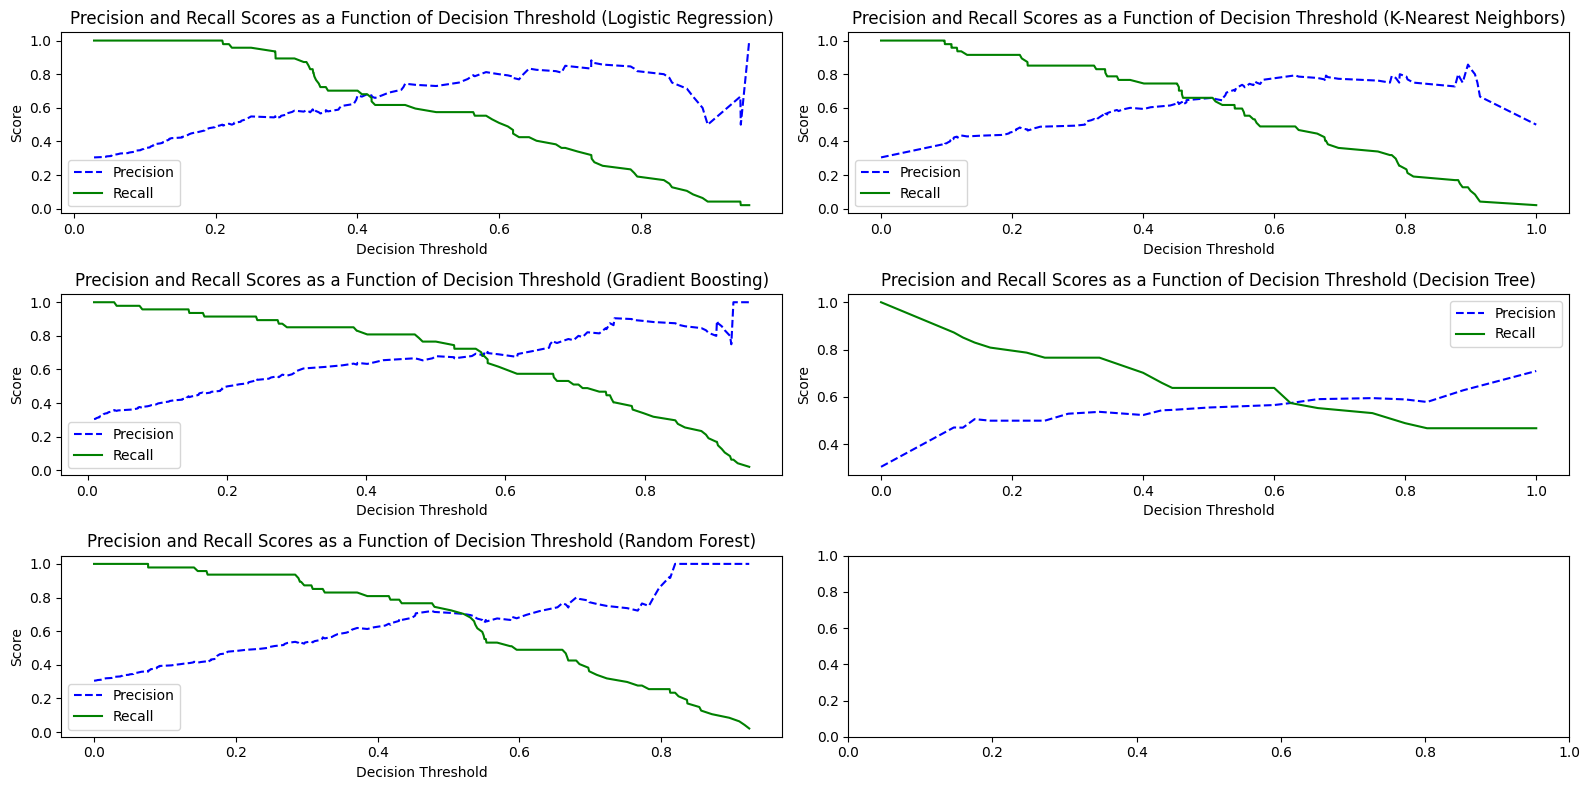

In [88]:
# Define the models
models = [lr, knn, gb, dt, rf]
model_names = ["Logistic Regression", "K-Nearest Neighbors", "Gradient Boosting", "Decision Tree", "Random Forest"]

# Define the number of rows and columns for the grid
num_rows = math.ceil(len(models) / 2)
num_cols = min(2, len(models))

# Create a figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8))

# Flatten the axes if necessary
if num_rows == 1:
    axes = [axes]

# Plot precision-recall curves for each model
for i, (model, name) in enumerate(zip(models, model_names)):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row][col]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_scores = model.predict_proba(X_test)[:, 1]
    
    # Compute precision and recall
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
    
    # Plot precision-recall vs threshold
    plot_precision_recall_vs_threshold(precision, recall, thresholds, name, ax)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

Learning Curve

In [89]:
# Import necessary functions/classes from sklearn
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, auc

# Define a function to plot learning curves
def plot_learning_curve(estimator, title, X_train, y_train, cv=None, n_jobs=-1, ax=None):
    # Generate learning curves using learning_curve function
    train_sizes, train_scores, test_scores = learning_curve(estimator, X_train, y_train, cv=cv, n_jobs=n_jobs)
    # Compute mean and standard deviation of training scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    # Compute mean and standard deviation of test scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Create a new figure and axis if not provided
    if ax is None:
        fig, ax = plt.subplots()
    
    # Fill the area between the training score curves
    ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    # Fill the area between the test score curves
    ax.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    # Plot the training score curve
    ax.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    # Plot the cross-validation score curve
    ax.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
    # Set title of the plot
    ax.set_title(title)
    # Set label for x-axis
    ax.set_xlabel("Training examples")
    # Set label for y-axis
    ax.set_ylabel("Score")
    # Add legend to the plot
    ax.legend(loc="best")


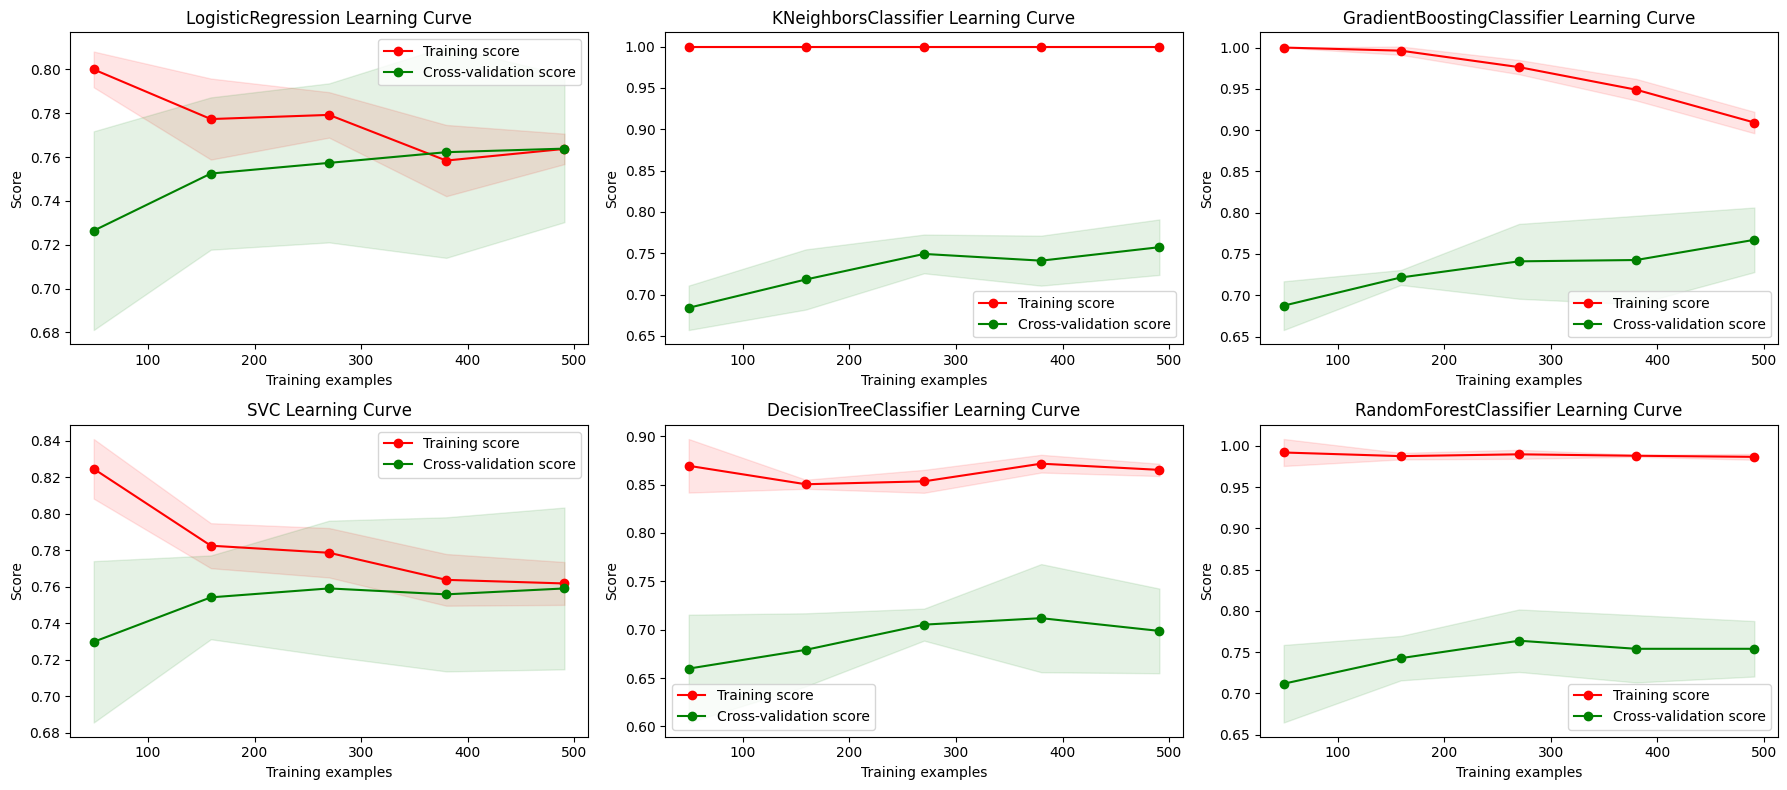

In [90]:
# Create subplots
models = [lr, knn, gb, svm, dt, rf]
# Define the layout of the grid
num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 8))

# Flatten the axes array to iterate over subplots
axes = axes.flatten()

for i, model in enumerate(models):
    plot_learning_curve(model, f"{model.__class__.__name__} Learning Curve", X_train, y_train, cv=5, ax=axes[i])

    # Set title for each subplot
    axes[i].set_title(f"{model.__class__.__name__} Learning Curve")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

ROC Curve

In [91]:
# Define a function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, ax=None):
    # Predict probabilities for positive class
    y_score = model.predict_proba(X_test)[:, 1]
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Create a new figure and axis if not provided
    if ax is None:
        fig, ax = plt.subplots()

    # Plot ROC curve
    ax.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    # Plot the diagonal dashed line
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    # Set limits for x-axis
    ax.set_xlim([0.0, 1.0])
    # Set limits for y-axis
    ax.set_ylim([0.0, 1.05])
    # Set label for x-axis
    ax.set_xlabel('False Positive Rate')
    # Set label for y-axis
    ax.set_ylabel('True Positive Rate')
    # Set title of the plot
    ax.set_title('Receiver Operating Characteristic (ROC) Curve')
    # Add legend to the plot
    ax.legend(loc="lower right")



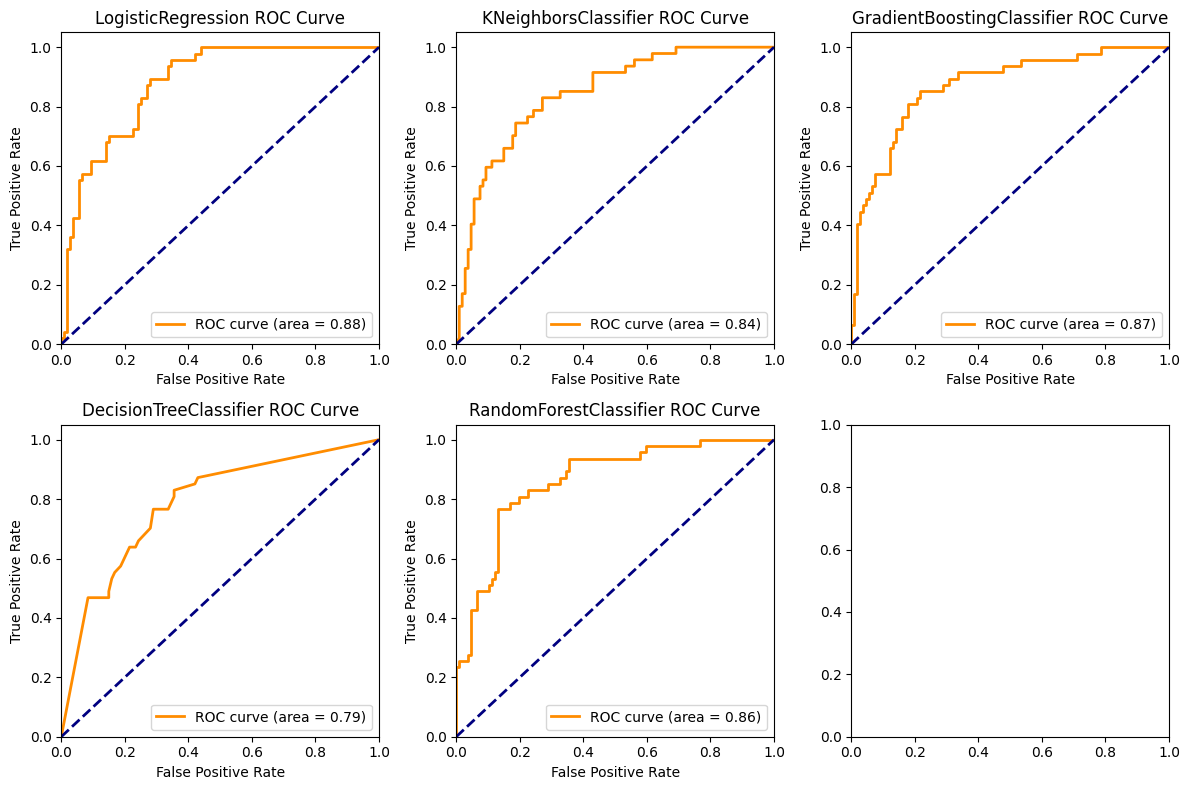

In [92]:
roc_models = [lr, knn,gb, dt, rf]  # Assuming these are your trained models

# Define the number of rows and columns for the subplot grid
num_rows = 2
num_cols = 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes array to iterate over subplots
axes = axes.flatten()

for i, model in enumerate(roc_models):
       plot_roc_curve(model, X_test, y_test, ax=axes[i])
       axes[i].set_title(f"{model.__class__.__name__} ROC Curve")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

AUC Curve: This is a convenient way to capture the performance of a model in a single number, although it's not without certain issues. As a rule of thumb, an AUC can be classed as follows,

0.90 - 1.00 = excellent

0.80 - 0.90 = good

0.70 - 0.80 = fair

0.60 - 0.70 = poor

0.50 - 0.60 = fail

Feature Importance

In [93]:
# Define a function to plot feature importance
def plot_feature_importance(model, feature_names, ax=None):
    # Get feature importances and sort them
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)

    # Create a new figure and axis if not provided
    if ax is None:
        fig, ax = plt.subplots()

    # Plot feature importance
    ax.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    ax.set_yticks(range(len(sorted_idx)))
    ax.set_yticklabels([feature_names[i] for i in sorted_idx])
    ax.set_xlabel('Importance')
    ax.set_title('Feature Importance')

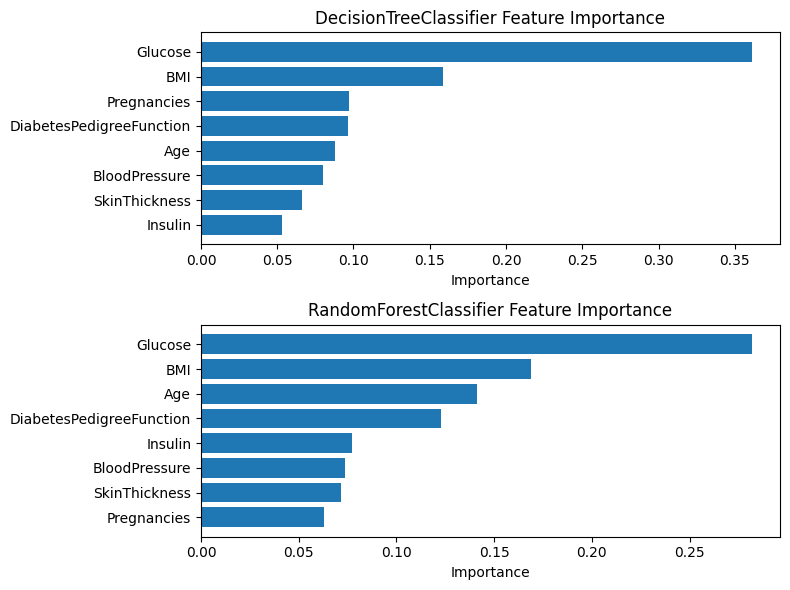

In [94]:
# Plot visualizations for each model
feature_importance_models = [dt, rf]  # Assuming these are your trained models

# Define the number of rows and columns for the subplot grid
num_rows = 2
num_cols = 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 6))

# Flatten the axes array to iterate over subplots
axes = axes.flatten()

for i, model in enumerate(feature_importance_models):
       plot_feature_importance(model, X.columns, ax=axes[i])
       axes[i].set_title(f"{model.__class__.__name__} Feature Importance")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [99]:
# Define lists to store insights for test sets
insights_test = []

# Define models list
models = [lr, knn, gb, svm, dt, rf]

# Loop through each model
for model in models:
    # Compute evaluation metrics for the model
    insights_test_model = compute_evaluation_metrics(model, X_test, y_test)
    
    # Append insights to the respective lists
    insights_test.append(insights_test_model)

# Create DataFrame for test sets
df_test = pd.DataFrame(insights_test)

# Select columns for the DataFrame
columns_to_select = ["Model",  "Accuracy", "Precision", "Recall/sensitivity", "Specificity", "F1-score", "ROC AUC", "Cross-Validation Accuracy"]

# Rename columns
df_test.columns = columns_to_select

# Display the DataFrame
print("\nTest Set Evaluation Metrics:")
display(df_test)


Test Set Evaluation Metrics:


,Model,Accuracy,Precision,Recall/sensitivity,Specificity,F1-score,ROC AUC,Cross-Validation Accuracy
0,LogisticRegression,0.805195,0.729730,0.574468,0.906542,0.642857,0.740505,0.791981
1,KNeighborsClassifier,0.792208,0.659574,0.659574,0.850467,0.659574,0.755021,0.792232
2,GradientBoostingClassifier,0.818182,0.679245,0.765957,0.841121,0.720000,0.803539,0.772373
3,SVC,0.798701,0.722222,0.553191,0.906542,0.626506,0.729867,0.791981
4,DecisionTreeClassifier,0.740260,0.566038,0.638298,0.785047,0.600000,0.711672,0.753268
5,RandomForestClassifier,0.824675,0.708333,0.723404,0.869159,0.715789,0.796282,0.811212


In [95]:
# Calculate the overall score for each model using a specified equation
for model in models:
    # Retrieve the evaluation metrics for the test set
    metrics = df_test[df_test['Model'] == model.__class__.__name__].iloc[0]
    # Calculate the overall score for the model
    score = (metrics['Accuracy']  +  metrics['Recall/sensitivity']+ metrics['Specificity']) / 3
    # Add the score to the DataFrame
    df_test.loc[df_test['Model'] == model.__class__.__name__, 'Score'] = score
print("\nBest Model:")
display(df_test)
# Find the model with the highest score
best_score = df_test['Score'].max()
best_model = df_test[df_test['Score'] == best_score]
print("\nBest Model:")
display(best_model)


Best Model:


,Model,Accuracy,Precision,Recall/sensitivity,Specificity,F1-score,ROC AUC,Cross-Validation Accuracy,Score
0,LogisticRegression,0.805195,0.729730,0.574468,0.906542,0.642857,0.740505,0.791981,0.762068
1,KNeighborsClassifier,0.792208,0.659574,0.659574,0.850467,0.659574,0.755021,0.792232,0.767417
2,GradientBoostingClassifier,0.818182,0.679245,0.765957,0.841121,0.720000,0.803539,0.772373,0.808420
3,SVC,0.798701,0.722222,0.553191,0.906542,0.626506,0.729867,0.791981,0.752812
4,DecisionTreeClassifier,0.779221,0.666667,0.553191,0.878505,0.604651,0.715848,0.707893,0.736972
5,RandomForestClassifier,0.831169,0.705882,0.765957,0.859813,0.734694,0.812885,0.798391,0.818980



Best Model:


,Model,Accuracy,Precision,Recall/sensitivity,Specificity,F1-score,ROC AUC,Cross-Validation Accuracy,Score
5,RandomForestClassifier,0.831169,0.705882,0.765957,0.859813,0.734694,0.812885,0.798391,0.81898


Each row represents a model, and columns include model name, evaluation metrics (accuracy, precision, recall, F1-score, ROC AUC, cross-validation accuracy), and the calculated overall score.
The "Score" column represents the calculated overall score for each model using the  accuracy and F1-score metrices.
The "Best Model" section displays the model with the highest overall score.
Insights from the output:

The logistic regression model has the highest overall score, indicating it performs the best according to the specified equation.
RandomForestClassifier also has a high overall score, suggesting it performs well overall.
DecisionTreeClassifier has the lowest overall score, indicating it performs relatively poorly compared to other models.

Based on this analysis, you can conclude that the logistic regression model is the best-performing model for Daibetes dataset 

#### Best Model


In [96]:
y_pred = rf.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 82.47


Difference between Actual and Predicted Values

In [97]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
661,1,1,0
122,0,0,0
113,0,0,0
14,1,1,0
529,0,0,0
...,...,...,...
476,1,0,1
482,0,0,0
230,1,0,1
527,0,0,0


Save Best Model in File

In [98]:
import pickle  # Import the pickle module

# Define the selected model
selected_model = rf  # select 'rf' to the best model 

# Save the selected model using pickle
pickle.dump(selected_model, open('best_model.pkl', 'wb+'))  # Dump the selected model to 'best_model.pkl' file

# Save the scaler object using pickle if applicable
pickle.dump(scaler, open('scaler.pkl', 'wb+'))  # Dump the scaler object to 'scaler.pkl' file if it's used for preprocessing